<div id="teaser" style=' background-position: right center; background-size: 00px; background-repeat: no-repeat; 
    padding-top: 30px;
    padding-right: 10px;
    padding-bottom: 110px;
    padding-left: 10px;
    background-color: #FFFEE9;
    border-radius: 15px;                    
    border-bottom: 4px solid #379;                    
    border-top: 4px solid #379;
    border-right: 4px solid #379;
    border-left: 4px solid #379;' > 

   <div style="text-align:center">
    <b><font size="6.7">Analysing dynamics data with unsupervised learning</font></b><br><br><br> 
    <b><font size="4.5">Machine Learning and Quantum Computing for Quantum Molecular Dynamics - 2022</font></b><br><br> 
  </div>

<p style="text-align:center;">
 <font size="3.0"> Author: Max Pinheiro Jr<sup>1</sup></font><br><br>
 <font size="3.0"> <sup>1</sup>Aix Marseille University, CNRS, Marseille, France<br>
<span class="cecam--last-updated" data-version="v1.0.0">[Last updated: August 24, 2022]</span>
</p>   
  
<div> 
<img  style="float: left;" src="https://www.cinam.univ-mrs.fr/cinam/wp-content/uploads/2018/11/logo-amu.png" width="210">    
<img  style="padding: 10px; float: right;" src="https://www.cecam.org/themes/cecam/assets/images/logo.png" width="240">
</div>
</div>

This tutorial is devoted to the application of unsupervised machine learning methods to analyze and interpret chemical data generated by molecular dynamics simulations. Broadly speaking, the main goal in unsupervised learning is to find natural grouping structure or possible associations within the data, or even a compact representation for the data based on measures on a set of inputs. Many algorithms have been developed to accomplish these tasks being *dimensionality reduction* and *clustering analysis* the two most representative and important branches of unsupervised learning. Here we will explore some of the these techniques for data analysis by considering practical examples based on a molecular configurational dataset generated from snapshots of molecular dynamics simulations to facilitate your understanding of the theory underpinning the methods. Instead of going deep into mathematical details we will dive into a few introductory examples of the methods (when viable) using simplified or *toy* data to explain and illustrate how the algorithms work in practice. <br><br> The tutorial was designed to run in a Python environment, so a basic knowledge of this programming language will be helpful. For those that are not familiar with Python, I suggest you to take a time to check the [Python documentation](https://docs.python.org/3/) and the [Numpy manual](https://numpy.org/doc/1.18/) for clues.

**Links to access the tutorial:**

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/maxjr82/CECAM-MLQCDyn/blob/main/tutorial/UL_for_MD.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/maxjr82/CECAM-MLQCDyn/blob/main/tutorial/UL_for_MD.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

# Instructions:

- To run the code cells in the *google colab* platform, it will be necessary to install a few non-standard Python packages. This can be done by copying the linux command shown below and running it in a normal code cell (note that to run any Linux command the code line must start with "!") of the google colab environment:<br><br> **! pip install py3Dmol**<br><br>

- To run the tutorial exercises locally, you will need first to download the corresponding molecular dataset from the MD17 database. The Linux command to download the dataset is provided below and it should be executed in a code cell of Jupyter notebook or in google colab:<br><br> **! wget http://quantum-machine.org/gdml/data/npz/ + molecule_name + _dft.npz**

In [ ]:
# Use this code cell to install the packages you need


# Outline

The topics covered by this tutorial are organized as follows:
 
1. [Dimensionality reduction](#dim_reduction)
    1. [Principal Component Analysis (PCA): a brief introduction 🏡](#pca_intro)
    2. [Tutorial I: applying PCA to a molecular dynamics dataset 🖥️](#tutor1_pca)
    3. [Nonlinear dimensionality reduction: kernelizing PCA 🏡](#kpca_intro)
    3. [Tutorial II: nonlinear compression of MD data with kernel PCA 🖥️](#tutor2_kpca)
3. [Clustering analysis](#clustering)
    1. [K-Means: a brief introduction 🏡](#kmeans)
    2. [Tutorial III: clustering MD data with K-Means 🖥️](#tutor3_kmeans)
    3. [Evaluation metrics for clustering](#optimal_k)

<a id='dim_reduction'></a>
# Dimensionality reduction

The main goal of dimensionality reduction as an unsupervised learning technique is to scale down the original dimension of the data by removing redundant or noisy features in order to obtain a compact representation of the data that still preserve its structure and usefulness. In this way, dimensionality reduction algorithms can be used either as a data exploration tool that enables a visual inspection of the data structure via scatter plots or as a preprocessing step to provide effectively compact input data for supervised learning methods. 

<a id='pca_intro'></a>
## Principal Component Analysis (PCA): a brief introduction 🏡

**[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)** is a linear dimension reduction algorithm that works by finding a **mutually orthogonal** set of axes (i.e., linearly independent) that accounts for the largest variance in the data. These set of linearly uncorrelated axes are called *principal components* (PCs) and can equivalently be defined as the directions that **maximizes the variance of the projected data**. Thus, PCA is a technique from linear algebra that aims to represent the data within the lowest possible dimension (that is, using the fewest number of principal components) while still preserving the most relevant information contained in the original data space.

In [ ]:
from IPython.display import YouTubeVideo

vid = YouTubeVideo('nEvKduLXFvk', width=600, height=450)
display(vid)

Mathematically, the PCs can be obtained in a closed-form solution either by solving the **eigenvalue problem of the covariance matrix** or via **singular value decomposition**. One can also find the optimal reduced subspace with PCA by computing the so-called **reconstruction error** which measure how much the data projected onto the lower dimensional space spanned by the $k$-PCs deviates or differ from the original input data as given by the Euclidean distance between the original and reconstructed data points. This difference comes from the fact that compressing the data to a lower dimension always comes at the expense of some information loss. However, by [**minimizing the reconstruction error**](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/dimensionality/paper-1x2.pdf), we enforce that such an information loss be as small as possible. It can be shown that the reconstruction error corresponds to the sum of the eigenvalues of the covariance matrix for the $m$ discarded principal components.

**General applications:**

  - visualization of high dimensional data 
  - reduce computational cost for ML
  - feature extraction 
  - noise-filtration 
  
**In computational chemistry:**

- [characterization of chemical reaction pathways from molecular dynamics simulations](https://pubs.rsc.org/en/content/articlelanding/2019/SC/C9SC02742D#!divAbstract)
- [improve the quality of molecular descriptor for neural network potentials](https://aip.scitation.org/doi/10.1063/5.0009264)

In [1]:
# Math libraries
import numpy as np

# Data manipulation 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.style.use("ggplot")

**PCA algorithm from scratch**

In [ ]:
class PCA:
    '''
    Implementation of the PCA method.
    
    Class attributes:
        n_components: the number of leading dimensions after data compression.
        
    Argument of the functions:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the features defined as columns (N).
    '''
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # STEP 1: Center the data by the mean, i.e, make the
        # the sample mean of each column equal to zero.
        # WARNING: check for outliers!
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # STEP2: Calculate the covariance matrix of (X - X_mean)
        # In numpy, the cov function needs samples as columns
        cov = np.cov(X.T)
        # STEP 3: Compute eigenvalues and eigenvectors
        # np.eigh function returns them in ascending order
        eigvals, eigvecs = np.linalg.eigh(cov)
        # STEP 4: sort eigenvectors and transpose them for easier calculations
        eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
        eigvecs = eigvecs.T
        # STEP 5: store the first n eigenvectors
        self.components = eigvecs[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        # project the data along the n PCA components by computing the scalar product
        X_trans = np.dot(X, self.components.T)
        return X_trans

Let us now test the PCA class above on a simple 2D array of data points representing a linear distribution with some noise added to the data. 

In [ ]:
# Generate data from a linear equation: y = m*x + c
m, c = 0.5, -3
X = [[i,m*i+np.random.uniform(10) + c] for i in range(-20,20)]
X = np.array(X)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Now, we apply our PCA algorithm keeping the 2 components of the feature space. Note that in this case we are not reducing the dimensionality of the original data. 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
# Each column of the matrix below correspond to one PC axis
print(pca.components)

<div class="alert alert-block alert-warning">
<b>📝 Important:</b> Note that each of the PCA components must be mutually orthogonal. You can check this property by calculating the scalar product between the columns of the matrix above using, for example, the np.dot function of Numpy. 
</div>

As a linear method, PCA has the important advantage of being easily explainable. Indeed, each principal component has the so-called **explained variance** associated with it, which essentially tells us, in percentage terms, how much of the total variance in the data is captured by each one of the principal components (PC). The variance obtained for each PC is sorted in a decreasing order, so that PC1 is the component contributing the most to the explained variance.

In [ ]:
def explained_variance(X_data):
    '''This function calculates the fraction of variance explained by a principal component for an 
    input dataset X_data provided as a numpy array. To do that, the variance is calculated for each 
    column of the data and then divided by the total variance.''' 
    
    n_sample, n_cols = X_data.shape
    # compute the variance of the whole data set
    total_var = (X_data**2).sum()/(n_sample-1)
    # variance of selected columns
    vars_col = np.array([np.var(X_data[:,i], ddof=1) for i in range(n_cols)])
    explained_var_ratio = vars_col/total_var
    
    return explained_var_ratio

In [ ]:
explained_var_original = explained_variance(X)
explained_var_transformed = explained_variance(X_transformed)
print("******************")
print("  Variance ratio:")
print("******************")
print(" ")
print("Original data")
print("  X1  {:2.2f} \n  X2  {:2.2f}".format(explained_var_original[0]*100,
                                             explained_var_original[1]*100))
print(" ")
print("Transformed data")
print("  PC1  {:2.2f} \n  PC2  {:2.2f}".format(explained_var_transformed[0]*100,
                                               explained_var_transformed[1]*100))

The PCA algorithm is also available in the **Scikit-Learn** package (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), one of the most popular toolkit used for machine learning and data science.

In [ ]:
from sklearn.decomposition import PCA

# Instantiate the PCA object with the desired number
# of dimensions to keep (n_components = 1, 2, 3,...)
pca_n2 = PCA(n_components=2)
pca_n2.fit(X)
X_trans_pc2 = pca_n2.transform(X)

Compare the PCA components and the explained variance ratio calculated using the scikit-learn library with those ones obtained previously with our PCA implementation. 

In [ ]:
print("**********************************")
print("Principal components from sklearn:")
print("**********************************")
print(" ")
print(pca_n2.components_)
print(" ")
print("**************************************")
print("Explained variance ratio from sklearn:")
print("**************************************")
print(" ")
print(pca_n2.explained_variance_ratio_)

For comparison purpose, let's also project the data with PCA using only one principal component. In this case, the reduced data can be plotted along a single straight line.

In [ ]:
pca_n1 = PCA(n_components=1)
pca_n1.fit(X)
X_trans_pc1 = pca_n1.transform(X)
X_reconstructed = pca_n1.inverse_transform(X_trans_pc1)

In [ ]:
X_trans_pc1 = np.concatenate([X_trans_pc1, np.zeros_like(X_trans_pc1)], axis=1)
X_trans_pc1.shape

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0, color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot the original data on ax1
ax1.scatter(X[:, 0], X[:, 1], alpha=0.3, c="blue", label = "original")
ax1.scatter(X_reconstructed[:,0], X_reconstructed[:,1], alpha=0.5, 
            marker = "D", c="red", label = "reduced")
for length, vector in zip(pca_n2.explained_variance_, pca_n2.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_n2.mean_, pca_n2.mean_ + v, ax1)
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("Original data vs PC1", fontsize=16)
ax1.axis('equal')
ax1.legend(loc="upper left", shadow=True, fancybox=True, fontsize=14)

# plot the projected data on ax2
ax2.scatter(X_trans_pc2[:,0], X_trans_pc2[:,1], alpha=0.3,
            c="blue", label = "n_components = 2")
ax2.scatter(X_trans_pc1[:,0], X_trans_pc1[:,1], alpha=0.5,
            marker = "D", c="red", label = "n_components = 1")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_title("Transformed data (PC1 vs PC2)", fontsize=16)
ax2.axis('equal')
ax2.legend(loc="upper right", shadow=True, fancybox=True, fontsize=14)

plt.tight_layout()
plt.show()

---

<a id='tutor1_pca'></a>
## Tutorial I: applying PCA to a molecular dynamics dataset 🖥️

**The MD17 dataset**

In [2]:
import requests
from io import BytesIO

def get_md17_data(molecule_name: str) -> dict:
    '''Retrieve the MD17 dataset for a specified molecule directly from the website.'''
    md17_data_address = "http://quantum-machine.org/gdml/data/npz/"
    full_path = md17_data_address + molecule_name.lower() + "_dft.npz"
    r = requests.get(full_path, stream = True)
    data = np.load(BytesIO(r.raw.read()))
    return dict(data)

The data will be stored in memory as Python dictonary, where the keys store the ab initio molecular dynamics data for different quantities as well as metadata describing the dataset and the molecular system. In our exercise, the two most important quantities will be the *total energy (kcal/mol)* and the *molecular geometries (Angstroms)* which can be accessed with the keys E and R, respectively. 

In [3]:
# Use the commands below to read the from a local directory 
#data = dict(np.load('aspirin_dft.npz'))
#data.keys()

data = get_md17_data('aspirin')
for k in data.keys():
    content = data[k].shape
    if data[k].size == 1:
        content = data[k]
    print("{} ---> {}".format(k,content))

E ---> (211762, 1)
name ---> b'aspirin'
F ---> (211762, 21, 3)
theory ---> aims: PBE+TS, light tier 1
R ---> (211762, 21, 3)
z ---> (21,)
type ---> b'd'
md5 ---> b'3f0070b5c41dcb2610c292aef66c1033'


Before applying any ML model (either supervised or unsupervised), it is always a good and recommended practice to take a quick look at the data. So let's start by visualizing some frames of the aspirin MD data to see what the molecular structures look like. To do that, we will use the **py3Dmol** package that uses the Cartesian coordinates and atom labels to render the molecular structure. 

In [4]:
import py3Dmol

def view_molecule(data: dict, index: int) -> py3Dmol.view:
    
    symbols = {1:'H', 6:'C', 7:'N', 8:'O'}
    atom_number = data['z']
    n_atoms = atom_number.size
    labels = np.vectorize(symbols.get)(atom_number)
    labels = labels.reshape(-1,1)
    
    coords = data['R'][index].reshape(-1,3)
       
    xyz = np.concatenate((labels, coords), axis=1)
    n_atoms = xyz.shape[0]
    xyz_str = [str(i).strip('[]') for i in xyz]
    geom = str(n_atoms) + '\n' + ' ' + '\n'
    geom += '\n'.join(xyz_str)
    geom = geom.replace("'", "")
    
    style = {'stick': {'radius': .15}, 'sphere': {'scale': 0.20}}
    
    molview = py3Dmol.view(width=380,height=380)
    molview.addModel(geom,'xyz')    
    molview.setStyle(style)
    molview.setBackgroundColor('#FFFEE9')
    molview.zoomTo()
    
    return molview

In [5]:
mol = view_molecule(data, 5000)
mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
from itertools import combinations

def inv_dist_descriptor(xyz_matrix: np.ndarray) -> np.ndarray:
    '''Calculate the inverse pairwise distance descriptor from Cartesian coordinates.'''
    n_samples, n_atoms, _ = xyz_matrix.shape
    dist_vec_size = int(n_atoms * (n_atoms - 1)/2)
    r2_matrix = np.empty((n_samples, dist_vec_size))
    
    for idx in range(n_samples):
        distance_matrix = np.zeros((n_atoms, n_atoms))
        geom = xyz_matrix[idx]
        for i, j in combinations(range(len(geom)), 2):
            R = np.linalg.norm(geom[i] - geom[j])
            distance_matrix[j, i] = R

        r2_vector = distance_matrix[np.tril_indices(len(distance_matrix), -1)]
        r2_matrix[idx, :] = r2_vector.reshape(1,-1)
        
    return 1/r2_matrix

In [7]:
X = inv_dist_descriptor(data['R'])

In [26]:
# These preprocessing functions of sklearn can be used for rescaling data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

idx_samples = np.random.choice(X.shape[0], size=10000, replace=False)
X_train = X[idx_samples]
X_train = StandardScaler().fit_transform(X_train)

<div class="alert alert-block alert-info"> 
    <b>📌 Info: </b> 
    Data normalization can be an essential preprocessing step for some machine learning algorithms. Because PCA is essentialy a variance maximizing exercise, the algorithm will give higher weights for selecting features that contribute the most for the covariance matrix. Thus, if the features in the data set are not varying in a comparable scale, the PCA decomposition may lead to unreliable or artifficial results. To know more about the importance of data scaling for PCA and other ML algorithms, check out <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py">this link</a>. 
</div>

In [27]:
from sklearn.decomposition import PCA

pca_n2 = PCA(n_components=2)
pca_n2.fit(X_train)
X_transformed = pca_n2.transform(X_train)

In [28]:
pca_n2.explained_variance_ratio_

array([0.1520451 , 0.09241933])

**To practice 💪:<br><br>In the example above, the first two principal components (PC) obtained after applying the PCA dimension reduction can explain only 24% of the variability in the data. How many PC components one needs to keep in order to explain at least 95% of the data variance with PCA? In addition, make a plot of the cumulative explained variance ratio as a function of the number of principal components for the PCA transformed dataset.**

Hint: Check the acceptable values for the *n_components* argument of the PCA method in sklearn.

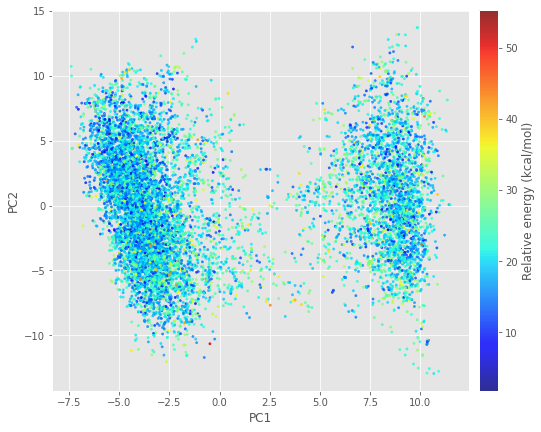

In [29]:
epot_train = data['E'][idx_samples]
epot_min = np.min(data['E'])

plt.figure(figsize=(9,7))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=5, alpha=0.8,
            c=epot_train-epot_min, cmap='jet')
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(pad=0.02)
cbar.set_label("Relative energy (kcal/mol)")
plt.show()

**Interpretating the results:** 

What do the two isolated clusters mean in terms of molecular conformation? Or we could also ask which (geometric) features of the molecule (e.g., bond lengths, angles or dihedrals) is mainly responsible for splitting the data into two big groups? 🤔

In [30]:
# ASE Documentation: 
# https://wiki.fysik.dtu.dk/ase/index.html
import ase

def get_dihedrals(coords: np.ndarray, symbols: list, indices: list) -> np.ndarray:
    dihedrals = []
    for xyz in coords:
        mol = ase.Atoms(symbols=labels, positions=xyz)
        dih_angle = mol.get_dihedral(*indices)
        if dih_angle > 180:
            dih_angle = 360 - dih_angle
        dihedrals.append(dih_angle)
    dihedrals = np.array(dihedrals)    
    return dihedrals

In [31]:
# These atoms correspond to the carboxylic group, COOH
atom_indices = [0,5,10,9]
labels = ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'O', 'O', 'C', 
          'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
dih = get_dihedrals(data['R'], labels, atom_indices)

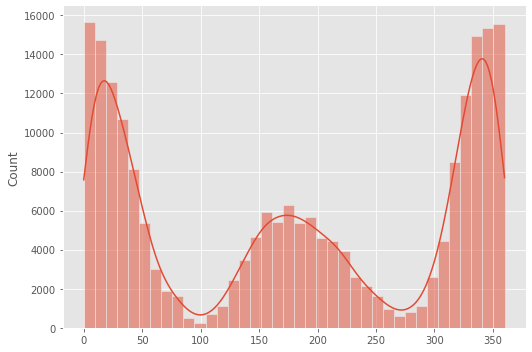

In [32]:
sns.displot(dih, kde=True, aspect=1.5)
plt.show()

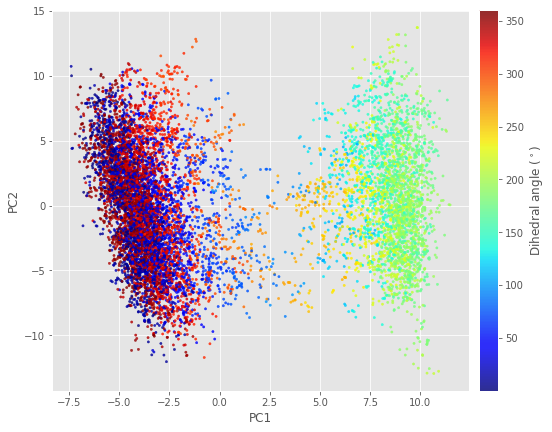

In [33]:
plt.figure(figsize=(9,7))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=5, alpha=0.8,
            c=dih[idx_samples], cmap='jet')
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(pad=0.02)
cbar.set_label(r"Dihedral angle ($^\circ$)")
plt.show()

---

<a id='kpca_intro'></a>
## Nonlinear dimensionality reduction: kernelizing PCA 🏡

In many real-world problems, a linear approximation is not enough to learn the patterns in the data and obtain a meaningful compact representation. Indeed, this is one of the PCA limitations. One possible way to circumvent this problem is to apply a nonlinear transformation that maps the original data into a higher-dimensional feature space whereby the data can be linearly separable or easily split into clusters (see an example in the video below). At a first glance, this idea may sound as a contradiction, since we are interested in reducing the dimensionality of the data rather than increasing it. However, if the transformation is applied properly, it turns out that the data should lie on a lower-dimensional manifold of the high dimensional data space generated by the transformation. In other words, we increase the dimensionality in order to be able to reduce it to obtain a meaningful representation of the data. 

In [ ]:
from IPython.display import YouTubeVideo

vid = YouTubeVideo('3liCbRZPrZA', width=600, height=450)
display(vid)

Formally, this transformation is performed via a *kernel function* which represents a nonlinear mapping of a sample $\mathbf{X}$ into a new feature space calculated as a dot product in the form $K(\mathbf{x}_i, \mathbf{x}_j) = \Phi(\mathbf{x}_i)^T \Phi(\mathbf{x}_j)$, where $\mathbf{x}_i$ and $\mathbf{x}_j$ are different data points. This approach gives rise to the so-called **[kernel principal component analysis](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)** (or KPCA for short) that can be considered as an extension of the "classic" PCA method. Due to the scalar product, the kernel function can be also viewed as a *similarity measure* between pair of data points. In KPCA, the covariance matrix can be expressed as

\begin{equation*}
Cov = \frac{1}{m} \sum_{i=1}^m \Phi(\mathbf{x}_i)^\top \Phi(\mathbf{x}_i).
\end{equation*}

However, instead of solving the eigenvalue problem directly for the covariance matrix as in PCA, it can be shown that in the kernel PCA algorithm the eigenvector equation is solved for the (centered) kernel matrix $\mathbf{K}$. Since we need to evaluate all pairwise dot product between data points, the computational cost of building the KPCA's kernel matrix scales with the number of samples in the data set.

**Some popular kernel functions:**

- polynomial $\rightarrow K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^\top \mathbf{x}_j +c_0)^d$
- gaussian or radial basis functions (RBF) $\rightarrow K(\mathbf{x}_i, \mathbf{x}_j) = \exp{ \left(\frac{-||\mathbf{x}_i - \mathbf{x}_j||_2^2}{2 \sigma^2} \right)} = \exp{ \left(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||_2^2 \right)}$, where $||\, . ||_2$ denotes the $l_2$ vector norm
- sigmoid $\rightarrow K(\mathbf{x}_i, \mathbf{x}_j) = \tanh( \gamma \mathbf{x}_i^\top \mathbf{x}_j + c_0)$

**For more details about kernel PCA, check out the links provided below:**

- [Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models](https://arxiv.org/abs/1207.3538)
- [Lecture by David R. Thompson](https://www.youtube.com/watch?v=HbDHohXPLnU&ab_channel=caltech)
- [Kernel PCA tutorial](https://www.youtube.com/watch?v=qC2GeVWSivw&ab_channel=TsungTaiYeh)

To understand the "magic" behind the kernel transformation, let's start with a simple example by considering 2D toy dataset where we can apply both PCA and kernel PCA methods to see in practice how they perform on nonlinear data. First, we will use the sklearn package to generate a synthetic 2D dataset that consists of concentric circles with some gaussian noise. 

In [ ]:
from sklearn.datasets import make_circles

# The y variable stores the labels that assign each point to the outer or inner circle 
X, y = make_circles(n_samples=500, random_state=51, noise=0.1, factor=0.05)

We can now store the noisy-circles data into a pandas dataframe object to facilitate the anaysis.

In [ ]:
df_circles = pd.DataFrame(X, columns=['x1','x2'])
df_circles['class'] = y
df_circles.head(5)

This is how the dataset looks like

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_circles, x="x1", y="x2", hue="class")
plt.show()

In the above plot, one can clearly see that there is no linear function able to separate the red and blue points. Furthermore, each circle has an isotropic distribution, meaning that the two features defining the circle, x1 and x2, have approximately same variance. 

In [ ]:
for c in df_circles['class'].unique():
    var_x1 = df_circles[df_circles['class'] == c]['x1'].var()
    var_x2 = df_circles[df_circles['class'] == c]['x2'].var()
    print('Circle {}'.format(c))
    print("=" * 10 + "\n")
    print("var(x1) = {:2.3f}".format(var_x1))
    print("var(x2) = {:2.3f}".format(var_x2))
    print("")

Because of these features, PCA is expected to fail in finding any meaningful projection of the circle data, and even if no projection is applied, the PCA transformation is still not very helpful as we will see in a moment. Anyways, since we want to see the effect of incorporating nonlinear effects in PCA via kernelization, we will perform the PCA analysis for comparison purposes.

In [ ]:
X = df_circles[['x1','x2']].values
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Now we add the principal components to the original 
# dataset, so we can visualize both results together
df_circles['PC1'] = X_transformed[:,0]
df_circles['PC2'] = X_transformed[:,1]

Now, we are going to apply the KPCA method implemented in the scikit-learn package on our dataset. Among the options ok kernel available in this package, here we will use the radial basis function as an example. For more details about different kernel approximations used in scikit-learn see the link:

https://scikit-learn.org/stable/modules/kernel_approximation.html

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="laplacian", gamma=1)
X_transformed = kpca.fit_transform(X)

df_circles['KPC1'] = X_transformed[:,0]
df_circles['KPC2'] = X_transformed[:,1]

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

# Plot of the original data points
ax1.set_title("Original space")
p1 = sns.scatterplot(data=df_circles, x="x1", y="x2", hue="class", ax = ax1)
p1.text(0.80, 0.85, "A", horizontalalignment='left', 
        size='large', color='black', weight='semibold')
p1.text(0.25, 0.45, "B", horizontalalignment='left',
        size='large', color='black', weight='semibold')
ax1.legend_ = None

# Plot of the data points transformed by KPCA
ax2.set_title("Projected by KPCA")
p2 = sns.scatterplot(data=df_circles, x="KPC1", y="KPC2", hue="class", ax = ax2)
p2.text(-0.25, 0.30, "A", horizontalalignment='left', 
        size='large', color='black', weight='semibold')
p2.text(0.40, 0.40, "B", horizontalalignment='left',
        size='large', color='black', weight='semibold')
ax2.legend(bbox_to_anchor=(1.15, 1.0),borderaxespad=0)

plt.tight_layout()
plt.show()

---

<a id='tutor2_kpca'></a>
## Tutorial II: nonlinear compression of MD data with kernel PCA 🖥️

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
from sklearn.decomposition import KernelPCA

kpca_2d = KernelPCA(n_components=2, kernel='rbf')
kpca_2d.fit(X_train)
X_transformed = kpca_2d.transform(X_train)

In [ ]:
epot_train = data['E'][idx_samples]
epot_min = np.min(data['E'])

plt.figure(figsize=(9,7))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=4, alpha=0.8,
            c=epot_train-epot_min, cmap='jet')
plt.xlabel("KPC1")
plt.ylabel("KPC2")
cbar = plt.colorbar(pad=0.02)
cbar.set_label("Relative energy (kcal/mol)")
plt.show()

**To practice 💪:**

**Use the code cells above as example to test the kernel PCA projection with different values of the gaussian width (see gamma hyperparameter in sklearn documentation) used in the RBF kernel. You can test values in the range of 0.01 to 0.02. Try also different kernels (e.g., laplacian and sigmoid kernels). How sensible is the distribution of the projected data with respect to changes in these hyperparameters?**

If you would like to know more about hyperparameter selection in kernel principal component analysis, check out this paper: http://thescipub.com/abstract/10.3844/jcssp.2014.1139.1150

---

<a id='clustering'></a>
# Clustering analysis

[**Clustering**](https://en.wikipedia.org/wiki/Cluster_analysis) refers to a broad class of unsupervised  learning techiniques used to recognize subgroups, or clusters, of points in a data set that are related to each other and different from other groups of points based on some **similarity criteria**. In this case, the algorithm's goal is to programmatically identify groups of data points that are coherent internally, i.e. sharing a high similarity score, but clearly different from each other. The greater the similarity (or homogeneity) within a group and the greater the difference between groups, the better the result of the clustering algorithm. This notion of similarity is present in all clustering algorithms that differ from one another essentially in relation to the mathematical formulation of what constitutes a cluster and how to efficiently find them. Popular clustering approaches include:

- **Centroid-based** $\rightarrow$ organizes the data into non-hierarchical clusters (K-Means, K-Medians)
- **Density-based** $\rightarrow$ connects areas of high sample density into clusters (DBSCAN, OPTICS)
- **Hierarchical** $\rightarrow$ creates a tree of clusters (Agglomerative)
- **Distribution-based** $\rightarrow$ assumes data is composed of distributions, such as Gaussian distributions (Gaussian mixture models)

Evaluating the performance of clustering models is a quite challenging task since in most of the cases there is no information about classes distribution in the data. Considering only its internal structure, a "good" clustering usually involves a certain trade-off between *compactness* (intra-cluster cohesion) and *separability*. In addition, one might also evaluate a clustering algorithm based on the utility of the clustering in its intended application.

Unlike the dimensionality reduction techiniques discussed before, clustering analysis can be applied directly in the original *n*-dimensional feature space of the data to discover its structure, in this case, distinct clusters.

For an extensive list of clustering models, see [A Comprehensive Survey of Clustering Algorithms](https://link.springer.com/article/10.1007/s40745-015-0040-1).

<a id='kmeans'></a>
## K-Means: a brief introduction 🏡

[K-means](https://en.wikipedia.org/wiki/K-means_clustering) is one of the widely used algorithms for clustering analysis. This method performs a hard partition of the data into a predefined number of distinct (and non-overlapping) clusters, $\mathbf{k}$, by assigning each point $\mathbf{x}_i$ to the cluster with the nearest centroid. Here the centroid's position is given by the mean of all data points assigned to a given cluster. The algorithm start by selecting *k* centroids $C_1,...,C_k$ corresponding to the number of clusters desired. Then each data point is assigned to the closest centroid by computing the Euclidean distance with respect to all centroids to form the initial clusters. In the next, the centroids' position are updated according to the mean value of all data points assigned to each centroid in the previous step. These two steps are repeated iteratively until the centroids remain the
same, or match the previous iteration’s assignment. Thus, the idea behind K-means is to minimize the *within-cluster variation* given by the [sum of the squared error (SSE)](https://en.wikipedia.org/wiki/Residual_sum_of_squares) between each data point and its closest centroid, which is a measure of how much the samples within a cluster differ from each other.

**To know more about k-means, watch these lectures:**

- [Lecture 13.2 of the Machine Learning course (coursera) by Andrew Ng](https://www.youtube.com/watch?v=hDmNF9JG3lo&ab_channel=ArtificialIntelligence-AllinOne)
- [StatQuest: K-Means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer)

K-Means algorithm is also part of the giant scikit-learn library, which provides a very efficient code implementation. So here, instead of rewritting the K-Means algorithm from scratch, we will go through the first iteration of the optimization process step-by-step such that we can gain a better understanding of how the algorithm works in practice. Let's do it!  

**Unfolding the K-Means algorithm step-by-step**

First of all, we need to build a simple 2D data set having two randomly generated clusters in order to be able to visualize the steps of the algorithm using scatter plots.

In [ ]:
n_points = 25
center1 = [2,3]
center2 = [9,10]
X = np.repeat([center1, center2], [n_points, n_points], axis=0)
# Create two distinct blobs of points
X = X + np.random.randn(*X.shape)
# Stack the two cluster centers into one matrix
orig_centroids = np.array([center1, center2])
# Define the ground-truth labels for cluster evaluation
labels = np.array(['blue'] * n_points + ['red'] * n_points)
# Use a pandas DataFrame object as a container
df_clusters = pd.DataFrame(X, columns=['x','y'])
# Create a column of labels to be updated by K-Means
df_clusters['labels'] = None
df_clusters.sample(5)

**STEP 1:** Assign initial centroids "randomly" for the two clusters in the data set. Note that in this simple example we already know how many clusters we have (K=2), but this information is generally not known a priori. We will back to this point later. 

In order to guarantee that the initialized centroids will be not placed too far apart from the data points, we will select randomly the x and y coordinates of each centroid constrained by the limits (max and min) of the data set.

In [ ]:
x_max, y_max = df_clusters['x'].max(), df_clusters['y'].max()
x_min, y_min = df_clusters['x'].min(), df_clusters['y'].min()

init_center1 = np.array([np.random.uniform(x_min,x_max), np.random.uniform(y_min,y_max)])
init_center2 = np.array([np.random.uniform(x_max,x_min), np.random.uniform(y_max,y_min)])

plt.figure(figsize=(6,5))
plt.title("K-Means - STEP 1", fontsize = 18)
plt.scatter(df_clusters.x, df_clusters.y, c="k")
plt.scatter(init_center1[0],init_center1[1], c="k", edgecolor='yellow', s=150, marker="*")
plt.scatter(init_center2[0],init_center2[1], c="k", edgecolor='yellow', s=150, marker="*")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.tight_layout()
plt.show()

**STEP 2:** Now we need to calculate the Euclidean distance between *each data point in X and each point in the matrix of initialized centroids*. Note that this step is the most computationally expensive part of the K-Means algorithm because it involves (in the worst scenario) two loops with N iterations, where N is the number of samples in the data set. 

To avoid doing an expensive loop over all data points, we can do some reshaping in the centroids matrix to enable broadcasting with Numpy, in order to perform all the Euclidean distances calculations much faster, in a single shoot.  

In [ ]:
centroids = np.array([init_center1, init_center2])
centroids[:, None]

In [ ]:
def compute_distances(data, centroids):
    return np.linalg.norm(data - centroids[:, None], axis=2)

d = compute_distances(X, centroids)
d

<div class="alert alert-block alert-info"> 
    <b>📌 Info: </b> Note that the distance matrix above has a shape of (2, n_points * 2), where each row corresponds to a given cluster centroid and stores the distances with respect to all the data points. In other words, the matrix d represents two stacked arrays that are each of same length as the input X.     
</div>

**STEP 3:** Next, we want to assign a label to every data point based on the closest cluster centroid. To do that, we need to find the minimum distance on the 0th axis from the distance matrix *d* calculated above.

In [ ]:
current_labels = np.argmin(d, axis=0)
df_clusters['labels'] = current_labels
labels_mapping = {0: 'blue', 1: 'red'}
df_clusters['labels'] = df_clusters['labels'].map(labels_mapping)
df_clusters.sample(5)

In [ ]:
plt.figure(figsize=(6,5))
plt.title("K-Means - STEP 3", fontsize = 18)
sns.scatterplot(data=df_clusters, x="x", y="y", hue="labels")
plt.scatter(centroids[:,0], centroids[:,1], c="k", edgecolor='yellow', s=150, marker="*")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.tight_layout()
plt.show()

**STEP 4:** Update the position of the centroids by computing the mean value of the newly formed clusters. 

In [ ]:
centroids_new = df_clusters.groupby(["labels"]).mean()[["x","y"]].values

plt.figure(figsize=(6,5))
plt.title("K-Means - STEP 4", fontsize = 18)
sns.scatterplot(data=df_clusters, x="x", y="y", hue="labels")
plt.scatter(centroids_new[:,0], centroids_new[:,1], c="k", edgecolor='yellow', s=150, marker="*")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.tight_layout()
plt.show()

**STEP 5:** Repeat step 2 to 4 until the positions of the centroids do not change within a given threshold.

As you can see, the K-Means algorithm is quite simple and easy to understand. The animation below illustrates how the algorithm iteratively converges to find some cluster structure in the data.  

![kmeans_gif](./figs/kmeans_anim.gif "k-means")

<a id='tutor3_kmeans'></a>
## Tutorial III: clustering MD data with K-Means 🖥️

Now we are ready to apply the K-Means algorithm to our molecular dynamics data set by using the efficient implementation available in scikit-learn. To do so, the first step is to decide **how many clusters we will search for**. Remember that K-Means is a hard partitioning method that requires prior knowledge of the number of clusters existing in the data. As we will see later, there are some heuristics to try to find the optimal number of cluster for K-Means (which also work for other methods), but for now let's use the intution we have already gained with the dimensionality reduction analysis. According to PCA and KPCA, it seems that the aspirin data set can be divided in two big and well-separated cluster with a smaller cluster between them. Therefore, we will try **k = 3 as our first guess** for K-Means.

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

# Instantiate the KMeans class with the following arguments:
kmeans = KMeans(n_clusters=3, n_init=50, max_iter=100, random_state=51)

In [35]:
kmeans.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 100,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 50,
 'verbose': 0,
 'random_state': 51,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto'}

Beside the parameter *n_cluster* that defines the number of clusters to be searched, the two most important parameters of KMeans class are:

- *n_init* $\longrightarrow$ sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest value of the cost function (sum of squared estimate of errors, SSE).

- *max_iter* $\longrightarrow$ sets the number of maximum iterations for each initialization of the k-means algorithm.

Once we have created the model, we can apply the *fit* method to find the clusters in our molecular dataset. Here we will use the same preprocessed data as in Tutorial I (i.e, molecular geometries represented by the inverse R2 descriptor followed by a normalization with standard scaler). If you have lost the **X_train variable** in the notebook, please go back to [section 3.2](#tutor1_pca) and execute the code cells again.

In [36]:
kmeans.fit(X_train)
kmeans.labels_ = kmeans.predict(X_train)

Statistics from the initialization run with the lowest SSE are available as attributes of K-Means after calling the .fit() method:

In [37]:
print("Lowest SSE value: {}".format(kmeans.inertia_))
print(" ")
print("NumPy array with the converged centroid positions:\n")
print(kmeans.cluster_centers_.shape)
print(" ")
print("Number of iterations until convergence: {}".format(kmeans.n_iter_))

Lowest SSE value: 1704263.5294396507
 
NumPy array with the converged centroid positions:

(3, 210)
 
Number of iterations until convergence: 11


Finally, we can obtain the cluster assignments (which correspond to the K-Means model predictions) as a one-dimensional NumPy array by using the *kmeans.labels_* attribute as follows:

In [38]:
for n, k in enumerate(np.unique(kmeans.labels_)):
    count = (kmeans.labels_ == k).sum()
    print(f"Number of geometries in cluster {n} = {count}")

Number of geometries in cluster 0 = 3473
Number of geometries in cluster 1 = 2983
Number of geometries in cluster 2 = 3544


**Statistical analysis of the clustering results**

With the cluster labels information at hand, we can now analyze how much the groups of geometries identified by the K-Means algorithm differ from one another with respect to some property available in the molecular dataset. Here it is worth noting that one can use any chemical property, not necessarily the geometric features implicitly used as input for the model such as bond distances, angles, or dihedrals. To facilitate the analysis, let us first group some relevant chemical information available for the selected 10k geometries into a single Pandas dataframe. 

In [39]:
# Make sure that idx_samples correspond to the same one 
# used to build the X_train dataset for K-Means
epot_train = data['E'][idx_samples]
epot_min = np.min(data['E'])
erel = (epot_train-epot_min).flatten()
dih_samples = dih[idx_samples]

df_kmeans = pd.DataFrame({'erel': erel, 'dih_cooh': dih_samples, 
                          'kmeans_pred': kmeans.labels_})
df_kmeans.index = idx_samples
df_kmeans

,erel,dih_cooh,kmeans_pred
93102,12.070527,10.317183,0
180895,20.077274,29.642092,0
134471,23.768278,151.023515,1
110956,26.163385,191.044633,1
162385,13.603454,32.363281,0
...,...,...,...
76616,19.882284,218.191214,1
87126,14.919631,325.443170,2
46384,20.946211,306.017972,2
127306,20.899594,200.844162,1


By grouping the data according to the cluster's labels, one can calculate the basic statistical descriptors for all the properties stored in the dataframe above: 

In [40]:
df_kmeans.groupby('kmeans_pred').describe().reset_index().T

0            1            2
kmeans_pred           0.000000     1.000000     2.000000
erel        count  3473.000000  2983.000000  3544.000000
            mean     19.370535    20.932344    20.598723
            std       5.921832     5.774947     6.011660
            min       3.757491     5.603747     1.796881
            25%      15.271576    17.017661    16.457670
            50%      18.993909    20.621376    20.213909
            75%      23.071474    24.535418    24.228346
            max      55.291069    46.293186    52.524322
dih_cooh    count  3473.000000  2983.000000  3544.000000
            mean    191.392355   181.794881   174.645750
            std     155.743643    35.343184   151.987823
            min       0.025514    78.335009     0.028631
            25%      23.059054   155.462329    26.102248
            50%     308.228152   180.641132    76.247168
            75%     339.588886   207.837692   333.633652
            max     359.906894   280.201472   359.995093

<div class="alert alert-block alert-warning">
<b>📝 Important:</b> In general, clustering methods are often applied to a dataset in its original (possibly, high-dimensional) representation without the need for any data projection to a lower dimensional space prior to the clustering analysis. Since, in most real case studies, the number of features in the data (dimensions) is much higher than three, one can not simply analyze the clustering results with a scatter plot as we did in section 3.2 in the PCA analysis. In this case, the most straightforward way to check the quality of the clustering analysis is by plotting histograms (or boxplots) of the desired quantity for each cluster, which may reveal relevant statistical differences among the groups.
</div>

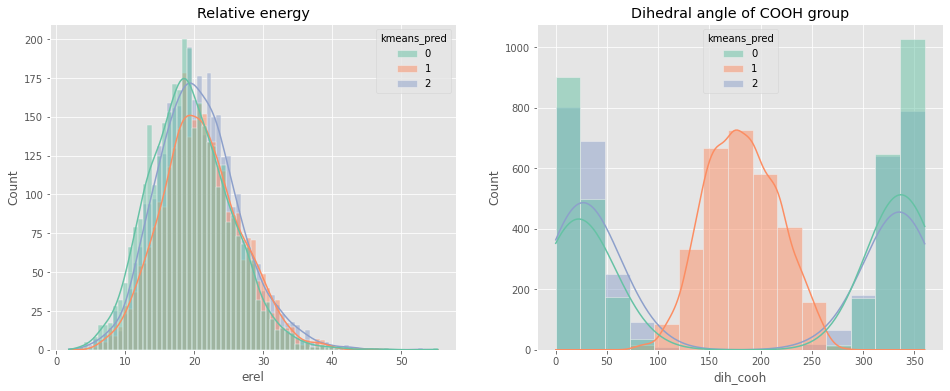

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

h1 = sns.histplot(data=df_kmeans, x="erel", hue='kmeans_pred', kde=True, 
                  palette="Set2", ax=axes[0])
h1.set(title = "Relative energy")
h2 = sns.histplot(data=df_kmeans, x="dih_cooh", hue='kmeans_pred', kde=True, 
                  palette="Set2", ax=axes[1])
h2.set(title = "Dihedral angle of COOH group")
plt.show()

**Combining K-Means results with PCA for visualization**

Since we already know how to project the data into a 2D plane using PCA, we can combine this reduced representation with the K-Means results to color the scatter plot according to the cluster labels. In this way, we can get an intuition on how the three groups identified by K-Means are distributed in space. 

In [42]:
pca_n2 = PCA(n_components=2)
pca_n2.fit(X_train)
X_transformed = pca_n2.transform(X_train)

df_pca = pd.DataFrame(X_transformed, columns = ['PC1', 'PC2'])
df_pca['kmeans_pred'] = kmeans.labels_
df_pca.index = idx_samples

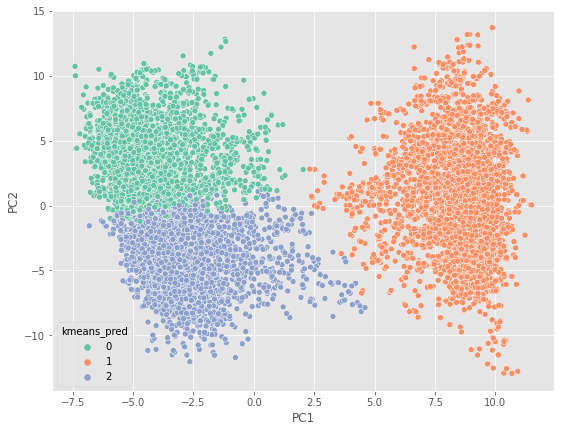

In [43]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans_pred', 
                palette='Set2')
plt.show()

<a id='optimal_k'></a>
## Evaluation metrics for clustering

A common problem in clustering analysis is *how to evaluate the appropriateness of the various data partitions* provided by a clustering algorithm. This is an issue because, in contrast to supervised learning, there is no ground truth available in most cases to judge the validity of clustering results. Moreover, the data is often high dimensional, so the clustering patterns can not be identified by simple visual inspection of the plotted data. Finally, some of the clustering algorithms (including K-Means) require prior knowledge of the number of cluster in which the data will be partitioned.

To mitigate these problems, several metrics have been proposed to compare different clustering algorithms and also to seek the optimal number of clusters in a given dataset. Typically, the clustering evaluation metrics can be divided into *internal*, when only the input data and the cluster labels are used, and *external*, where ground truth labels are available and can be used *a posteriori* for the evaluation.

📖 For a more complete list of clustering evaluation metrics with practical examples, check out the scikit-learn documentation at https://scikit-learn.org/stable/modules/clustering.html#rand-score.

**Internal evaluation metrics**

<div>
<img style="float: center;" src="./figs/cohesion-x-separation.png" width="550"/>
</div>

These metrics usually try to encode the notion of compactness (or cluster cohesion) and inter-cluster spread (or cluster separation) into a single number based on the distribution of the inputs within the clusters. Some of the most used internal metrics for assessing the "goodness" of the resulting clusters are

- [**Elbow method**](https://www.youtube.com/watch?v=lbR5br5yvrY)
- [Silhouette coefficient](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [**Davies Bouldin indicator**](https://ieeexplore.ieee.org/document/4766909)

In the following, we will see first an example of how to use the **Elbow method** to estimate the "correct" number of clusters in K-Means. The idea behind this method consists of running K-Means multiple times with an incremental number of clusters, $k$. Then, plotting the value of the loss function (i.e., the SSE value) as a function of $k$, we try to find the point at which the SSE curve starts to flatten out forming an "elbow". The Python code to run the Elbow method is quite simple as shown in the block cells below.

In [ ]:
kmeans_params = {"init": "random", "n_init": 20, 
                 "max_iter": 100, "random_state": 13,}

# A list holds the SSE values for each k
sse = []
k_list = range(1, 10)
for k in k_list:
    model = KMeans(n_clusters=k, **kmeans_params)
    model.fit(X_train)
    sse.append(model.inertia_)

In [ ]:
plt.plot(k_list, sse, "r-o")
plt.xticks(k_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In the plot shown above, one can see that the SSE values always decrease when increasing k. As more centroids are added, the distance from each point to its closest centroid will decrease. Thus, the idea is to find a point in the plot that results in a reasonable trade-off between error and the number of clusters. In this example, the Elbow method gives k=2 (or maybe k=3) as the optimal number of clusters.

It is always helpful (and recommended) to use at least two different metrics two evaluate the appropriateness of the clustering results to be able to choose the optimal number of clusters in the data with higher confidence. Here we will use another internal metric called **Davies-Bouldin indicator**, which is defined as the average similarity of each cluster with a cluster most similar to it, where similarity is the ratio of within-cluster distances to between-cluster distances. In this metric, the lower the value the better the clustering, with zero being the minimum score. Let's see below how to use sklearn to compute the DB score and use this metric to search for the optimal number of clusters for K-Means. 

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
from sklearn.metrics import davies_bouldin_score

scores = []
# Since the DB score is based on the comparison between clusters,
# we need to consider at minimum two clusters for K-Means. 
k_list = range(2, 10)
for k in k_list:
    model = KMeans(n_clusters=k, **kmeans_params)
    model.fit(X_train)
    dbs = davies_bouldin_score(X_train, model.labels_)
    scores.append(dbs)

In [ ]:
plt.plot(k_list, scores, "r-o")
plt.xticks(k_list)
plt.xlabel("Number of Clusters")
plt.ylabel("DB score")
plt.show()

The figure above confirms that K=2 is in fact the ideal number of clusters to partition the aspirin MD dataset. However, this does not necessarily mean that K-Means with K=2 identifies the "correct" distribution of molecular configurations in the data. Indeed, we have seen that there is a group of points corresponding to transition state geometries (COOH dihedral angle varying in the range of 75$^\circ$ to 105$^\circ$) which K-Means is not able to properly group in the same cluster. This problem may be related to the limitations of K-Means since the algorithm is not effective in identifying clusters with different sizes, densities and shapes.

**External evaluation metrics**

The external metrics are generally classification-oriented mesures whose the task is to compare the cluster assignments of each point provided by the algorithm with a list of ground truth labels available for the data. These reference labels should be a discrete variable characterizing a certain number of classes associated with the data. Then, we can compute an *external criterion* that evaluates how well the clustering matches the standard reference classes. Some of the available evaluation metrics based on an external criterion are:

- [**Rand index**](https://en.wikipedia.org/wiki/Rand_index)
- [Fowlkes–Mallows indicator](https://en.wikipedia.org/wiki/Fowlkes%E2%80%93Mallows_index#:~:text=The%20Fowlkes%E2%80%93Mallows%20index%20is,metric%20to%20measure%20confusion%20matrices.)
- [Normalized mutual information](http://proceedings.mlr.press/v32/romano14.pdf)

As an example, here we will calculate the **Rand index** by comparing the K-Means labels with a set of true labels that correspond to a discretization of the COOH dihedral variable into three ranges of angles: 0$^\circ$ to 70$^\circ$, 70$^\circ$ to 110$^\circ$, and 110$^\circ$ to 180$^\circ$. To create the reference class labels for the dihedrals, we will use the *.cut()* method of Pandas as demonstrated in the code cell below. 

> *The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.*<br><br> RI = (number of agreeing pairs) / (number of pairs) <br><br>
[from sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html?highlight=rand+index)

In [ ]:
df_kmeans['dih_classes'] = pd.cut(df_kmeans['dih_cooh'],bins=[0,70,110,180],labels=[0,1,2]).values
df_kmeans

In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

ri = rand_score(df_kmeans['dih_classes'].values, df_kmeans['kmeans_pred'].values)
ari = adjusted_rand_score(df_kmeans['dih_classes'].values, df_kmeans['kmeans_pred'].values)
print(ri, ari)

---